## Random Forest

#### Random Forests are still frequently used by the machine learning practitioners. They provide good accuracy and speed of training and can handle big datasets.

### Pros:
- Much easier to tune than Gradient Boosting Machine (two hyperparameters vs three);
- Almost always perform as well as or better than SVMs;
- Deal well with uneven datasets that have missing variables;
- Rarely overfits.

### Cons:
- Slow at prediction time so less appropriate for high-speed data processing;
- If data includes categorical variables with different numbers of levels, Random Forest is biased in favor of those with more levels. Therefore, the variable importance scores from Random Forest are not reliable.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

from my_ml_tools.my_ml_plot import Plot_2d
from my_ml_tools.my_ml_plot import Plot_2d_decision
from my_ml_tools.my_ml_plot import Plot_decision_regions

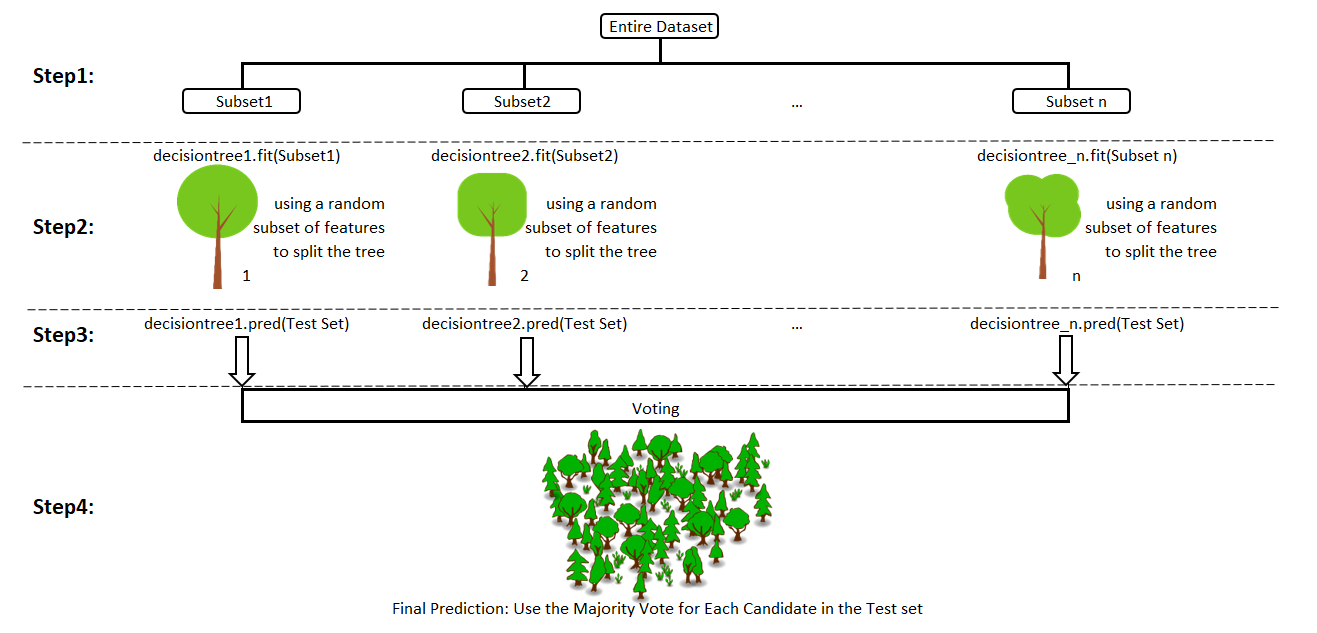

In [11]:
Image(filename = './charts/RandomForest.png', width=800)

In [3]:
from scipy.misc import comb

def ensemble_error(n_classifier, error):
    k_start = int(np.ceil(n_classifier / 2))
    probas = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier-k) for k in range(k_start, n_classifier+1)]
    return sum(probas)
                                                                                        

(0.0, 1.0, 0.0, 1.0)

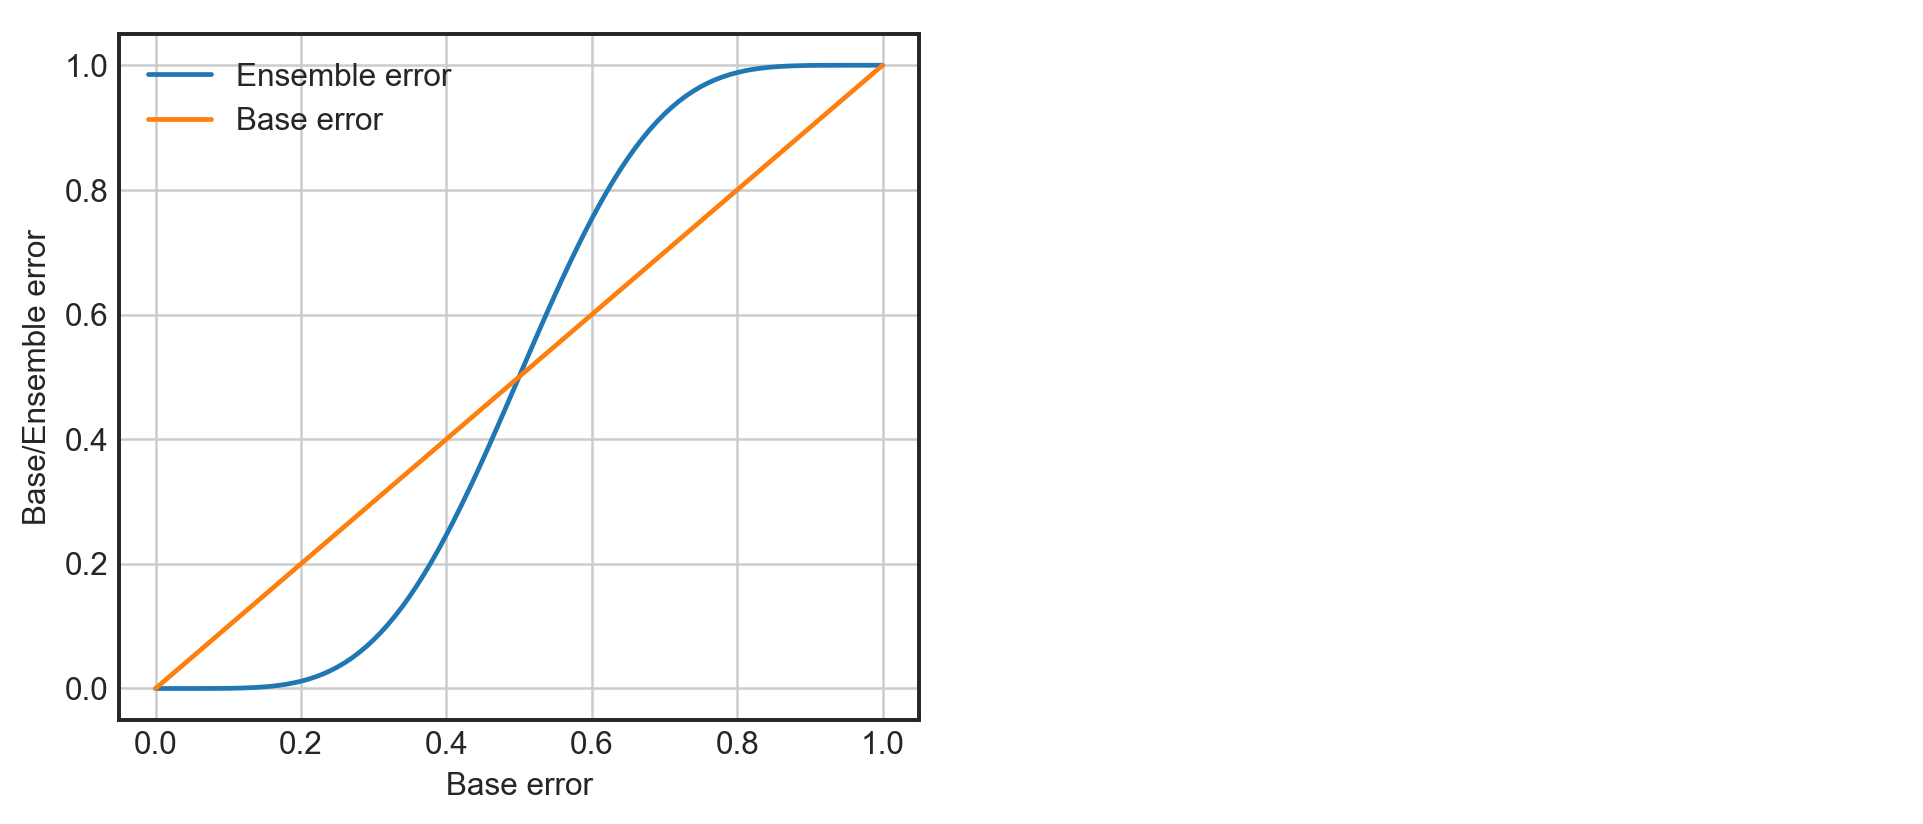

In [4]:
error_range = np.arange(0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(error_range, ens_errors, label='Ensemble error')
axes[0].plot(error_range, error_range, label='Base error')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Base error')
axes[0].set_ylabel('Base/Ensemble error')
axes[1].axis('off')

(0.0, 1.0, 0.0, 1.0)

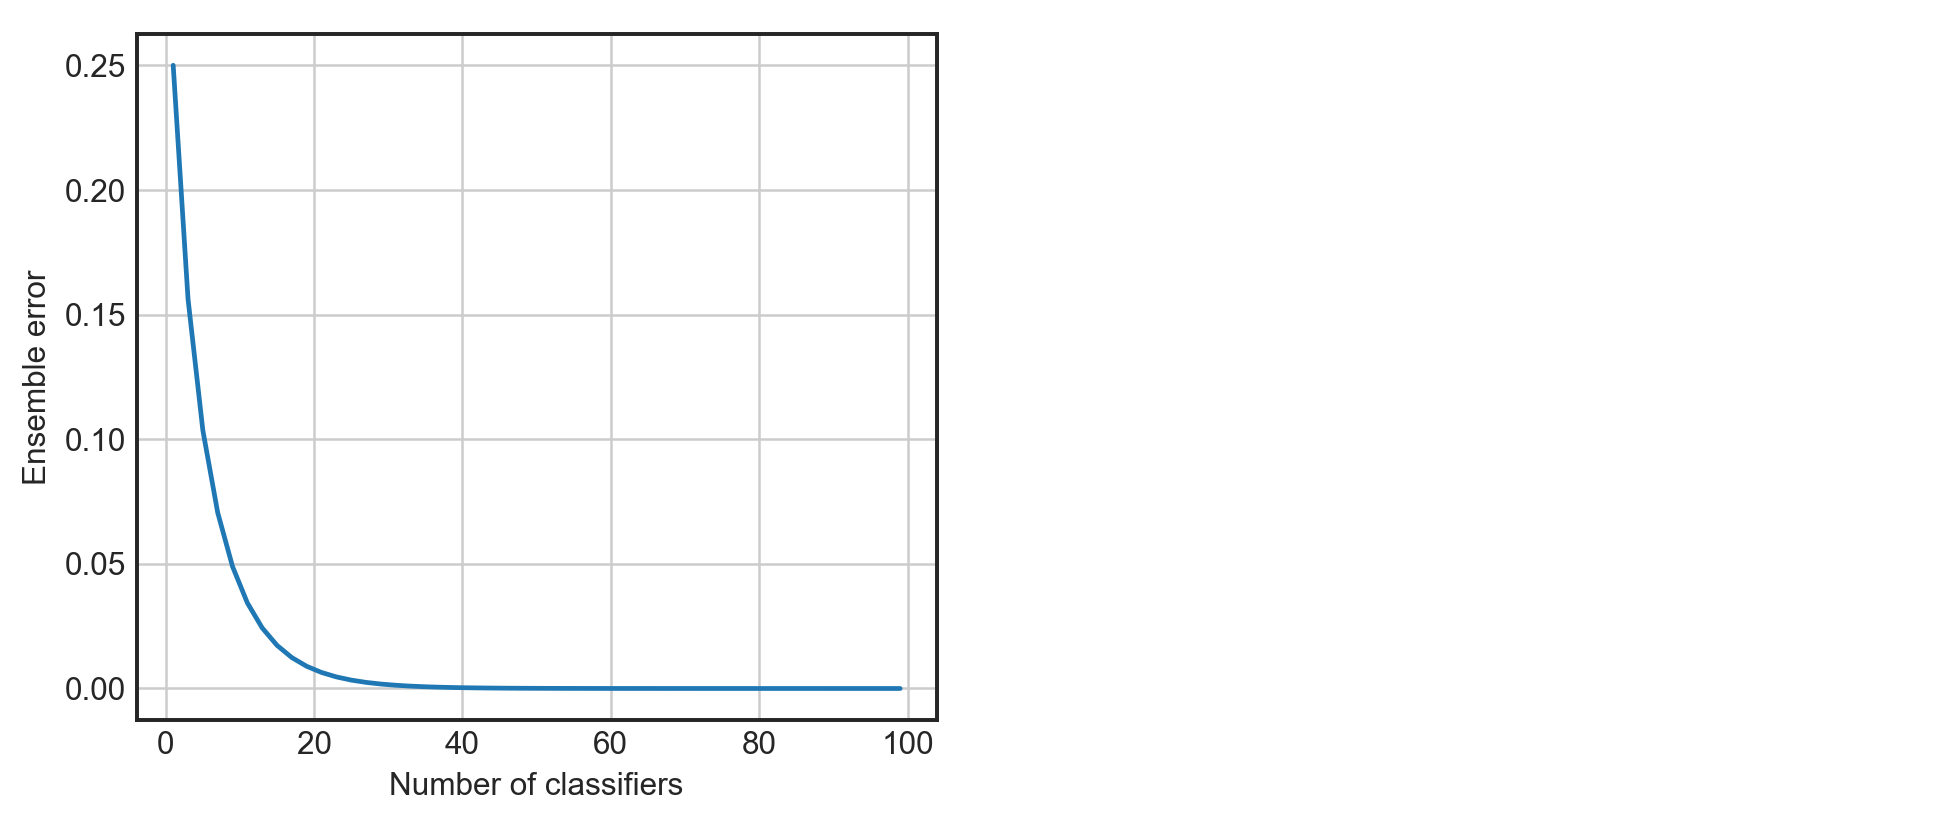

In [5]:
error = 0.25
ens_errors = []
for i in range(1, 100, 2):
    ens_errors.append(ensemble_error(n_classifier=i, error=0.25))

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(range(1, 100, 2), ens_errors, label='Ensemble error')
axes[0].grid()
axes[0].set_xlabel('Number of classifiers')
axes[0].set_ylabel('Ensemble error')
axes[1].axis('off')

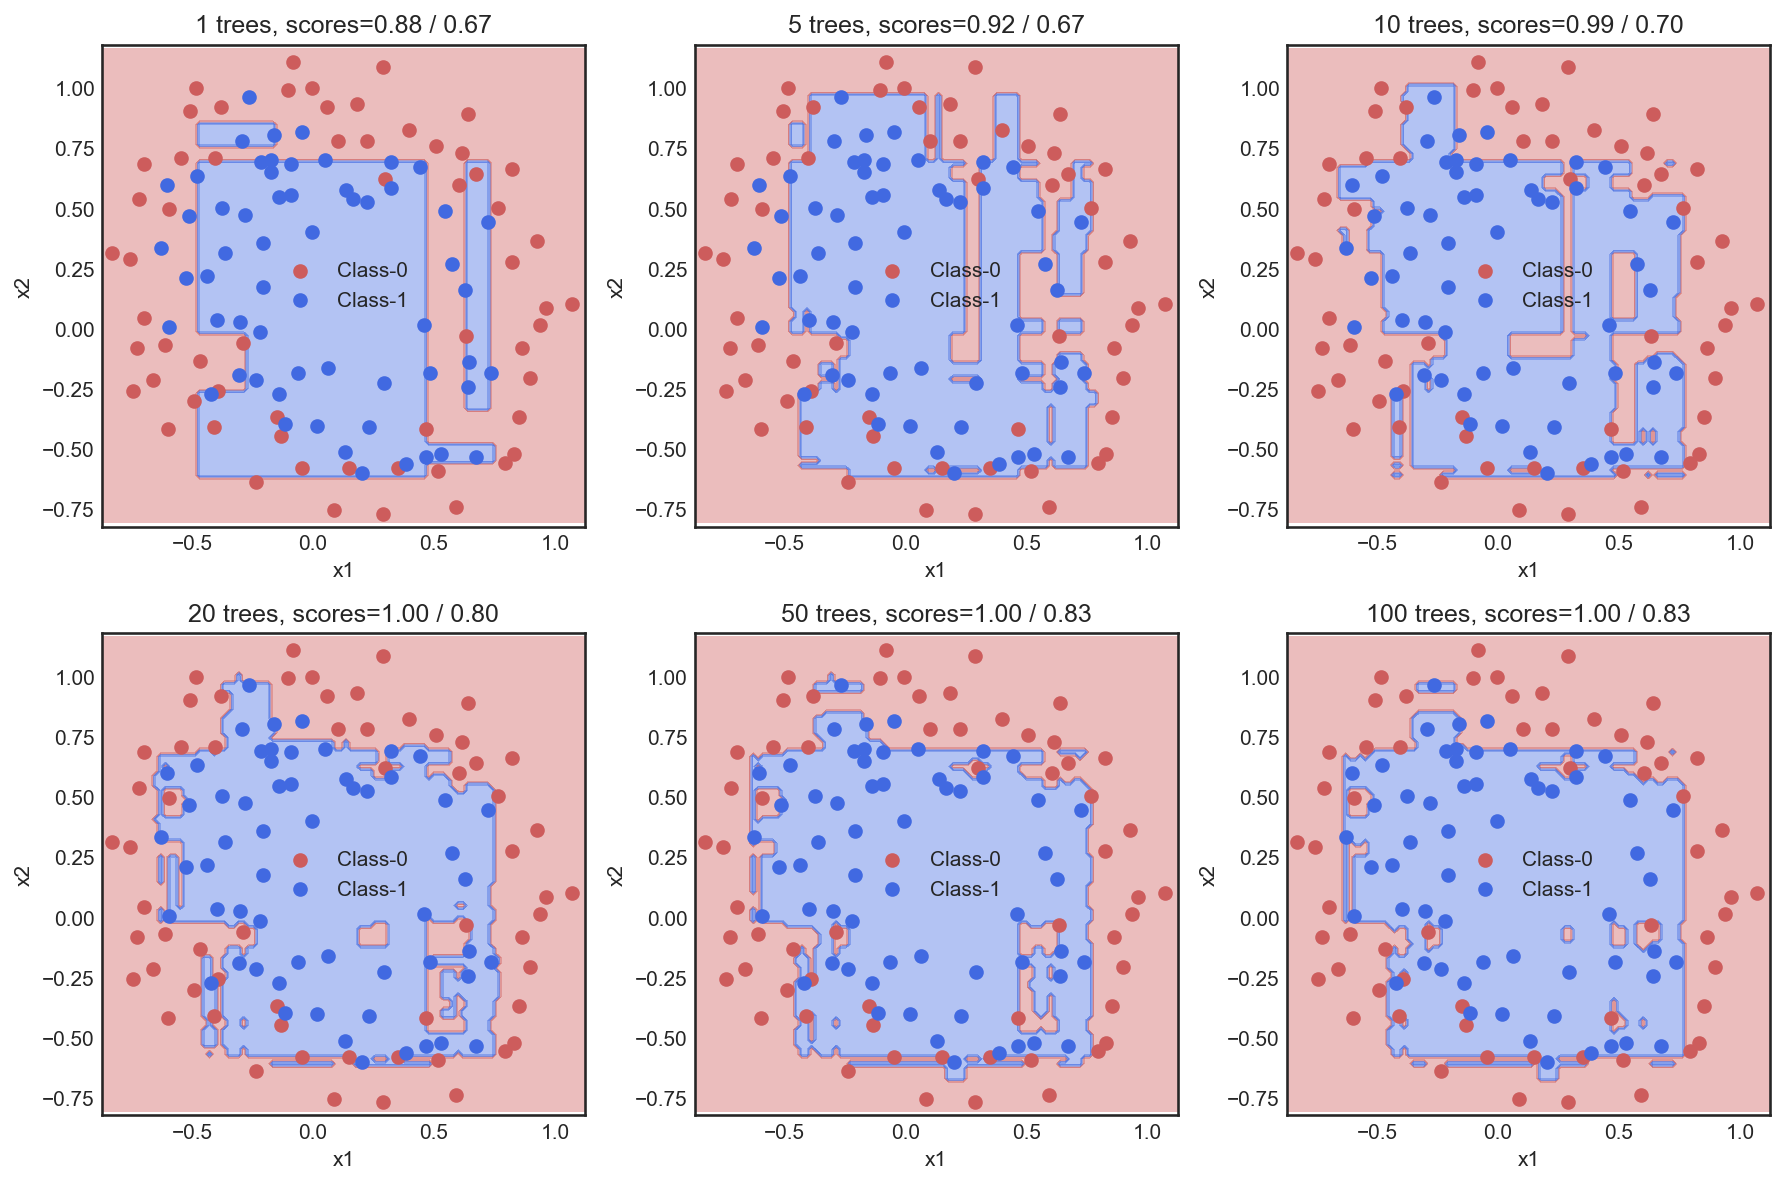

In [9]:
data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(np.int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
fig, axes = plt.subplots(2, 3, dpi=150, figsize=(12, 8))
for ax, n_estimators in zip(axes.ravel(), [1, 5, 10, 20, 50, 100]):
    clf = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, random_state=0)
    clf.fit(X_train, y_train)
    Plot_2d_decision(clf, X, y, fillcolor=True, ax=ax)
    Plot_2d(X, y, ax=ax)
    ax.set_title(f'{n_estimators} trees, scores={clf.score(X_train, y_train):.2f} / {clf.score(X_test, y_test):.2f}')
    ax.axis('equal')
plt.tight_layout()